# E2a: Küchentischversuch zum Laval-Rotor

Name: Marius Stumpe 
Datum: 12.01.2024  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Lassen sich, bei den von mir gewählten Gegenständen, eindeutige Frequenzen erkennen?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

!["Aufbau Mixer"](IMG_9561.jpg)

- Beschreibung des Aufbaus: Ich habe den Beschleunigungssensor mit Tesafilm an einem Handmixer angebracht.
- Vorgangsbeschreibung: Ich habe den Mixer angeschaltet, die Messung gestartet und nach dem Beenden der Messung den Mixer wieder ausgeschaltet.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240110_195122_Marius_Stumpe_Mixer" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240110_195122_Marius_Stumpe_Mixer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240110_195122_Marius_Stumpe_Mixer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240110_195122_Marius_Stumpe_Mixer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240110_195122_Marius_Stumpe_Mixer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeae406-efd7-6533-80b1-d37f5466d308": {
    "type": "probe",
    "name": "Mixer",
    "comment": "",
    "path": "measurement_data/dat

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
with h5py.File(path_measurement_folder + "/" + h5_file_name, "r") as measurement:
    acceleration_x = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["acceleration_x"])
    acceleration_y = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["acceleration_y"])
    acceleration_z = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["acceleration_z"])
    timestamp = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["timestamp"])


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
acceleration = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

In [6]:
plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
plt.plot(timestamp, acceleration)
plt.xlabel("time in seconds")
plt.ylabel("acceleration in meters per second squared ")

time_differences = []
for i in range(len(timestamp)-1):
    time_differences.append(timestamp[i+1]-timestamp[i])
timestamp_short = timestamp[0:len(timestamp)-1]

plt.subplot(2,1,2)
plt.plot(timestamp_short, time_differences)
plt.xlabel("time in seconds")
plt.ylabel("time between timestamps in seconds")

Text(0, 0.5, 'time between timestamps in seconds')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

[amp, freq] = my_fft(acceleration, timestamp)
plt.plot(freq, amp)
plt.xlabel("frequency")
plt.ylabel("amplitude in meters per second squared")
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Text(0, 0.5, 'amplitude in meters per second squared')

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

!["Aufbau Mixer"](IMG_9571.jpg)

- Beschreibung des Aufbaus: Ich habe den Beschleunigungssensor mit Tesafilm an einer Getreidemühle angebracht.
- Vorgangsbeschreibung: Ich habe die Getreidemühle angeschaltet, die Messung gestartet und nach dem Beenden der Messung die Getreidemühle wieder ausgeschaltet.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240111_204356_Marius_Stumpe_Getreidemuehle" 
h5_file_name = "data_20240111_204356_Marius_Stumpe_Getreidemuehle.h5"

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
with h5py.File(path_measurement_folder + "/" + h5_file_name, "r") as measurement:
    acceleration_x = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["acceleration_x"])
    acceleration_y = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["acceleration_y"])
    acceleration_z = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["acceleration_z"])
    timestamp = np.array(measurement["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]["timestamp"])


#### 2. Betrag der Beschleunigung berechnen


In [11]:
acceleration = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten

Text(0, 0.5, 'time between timestamps in seconds')

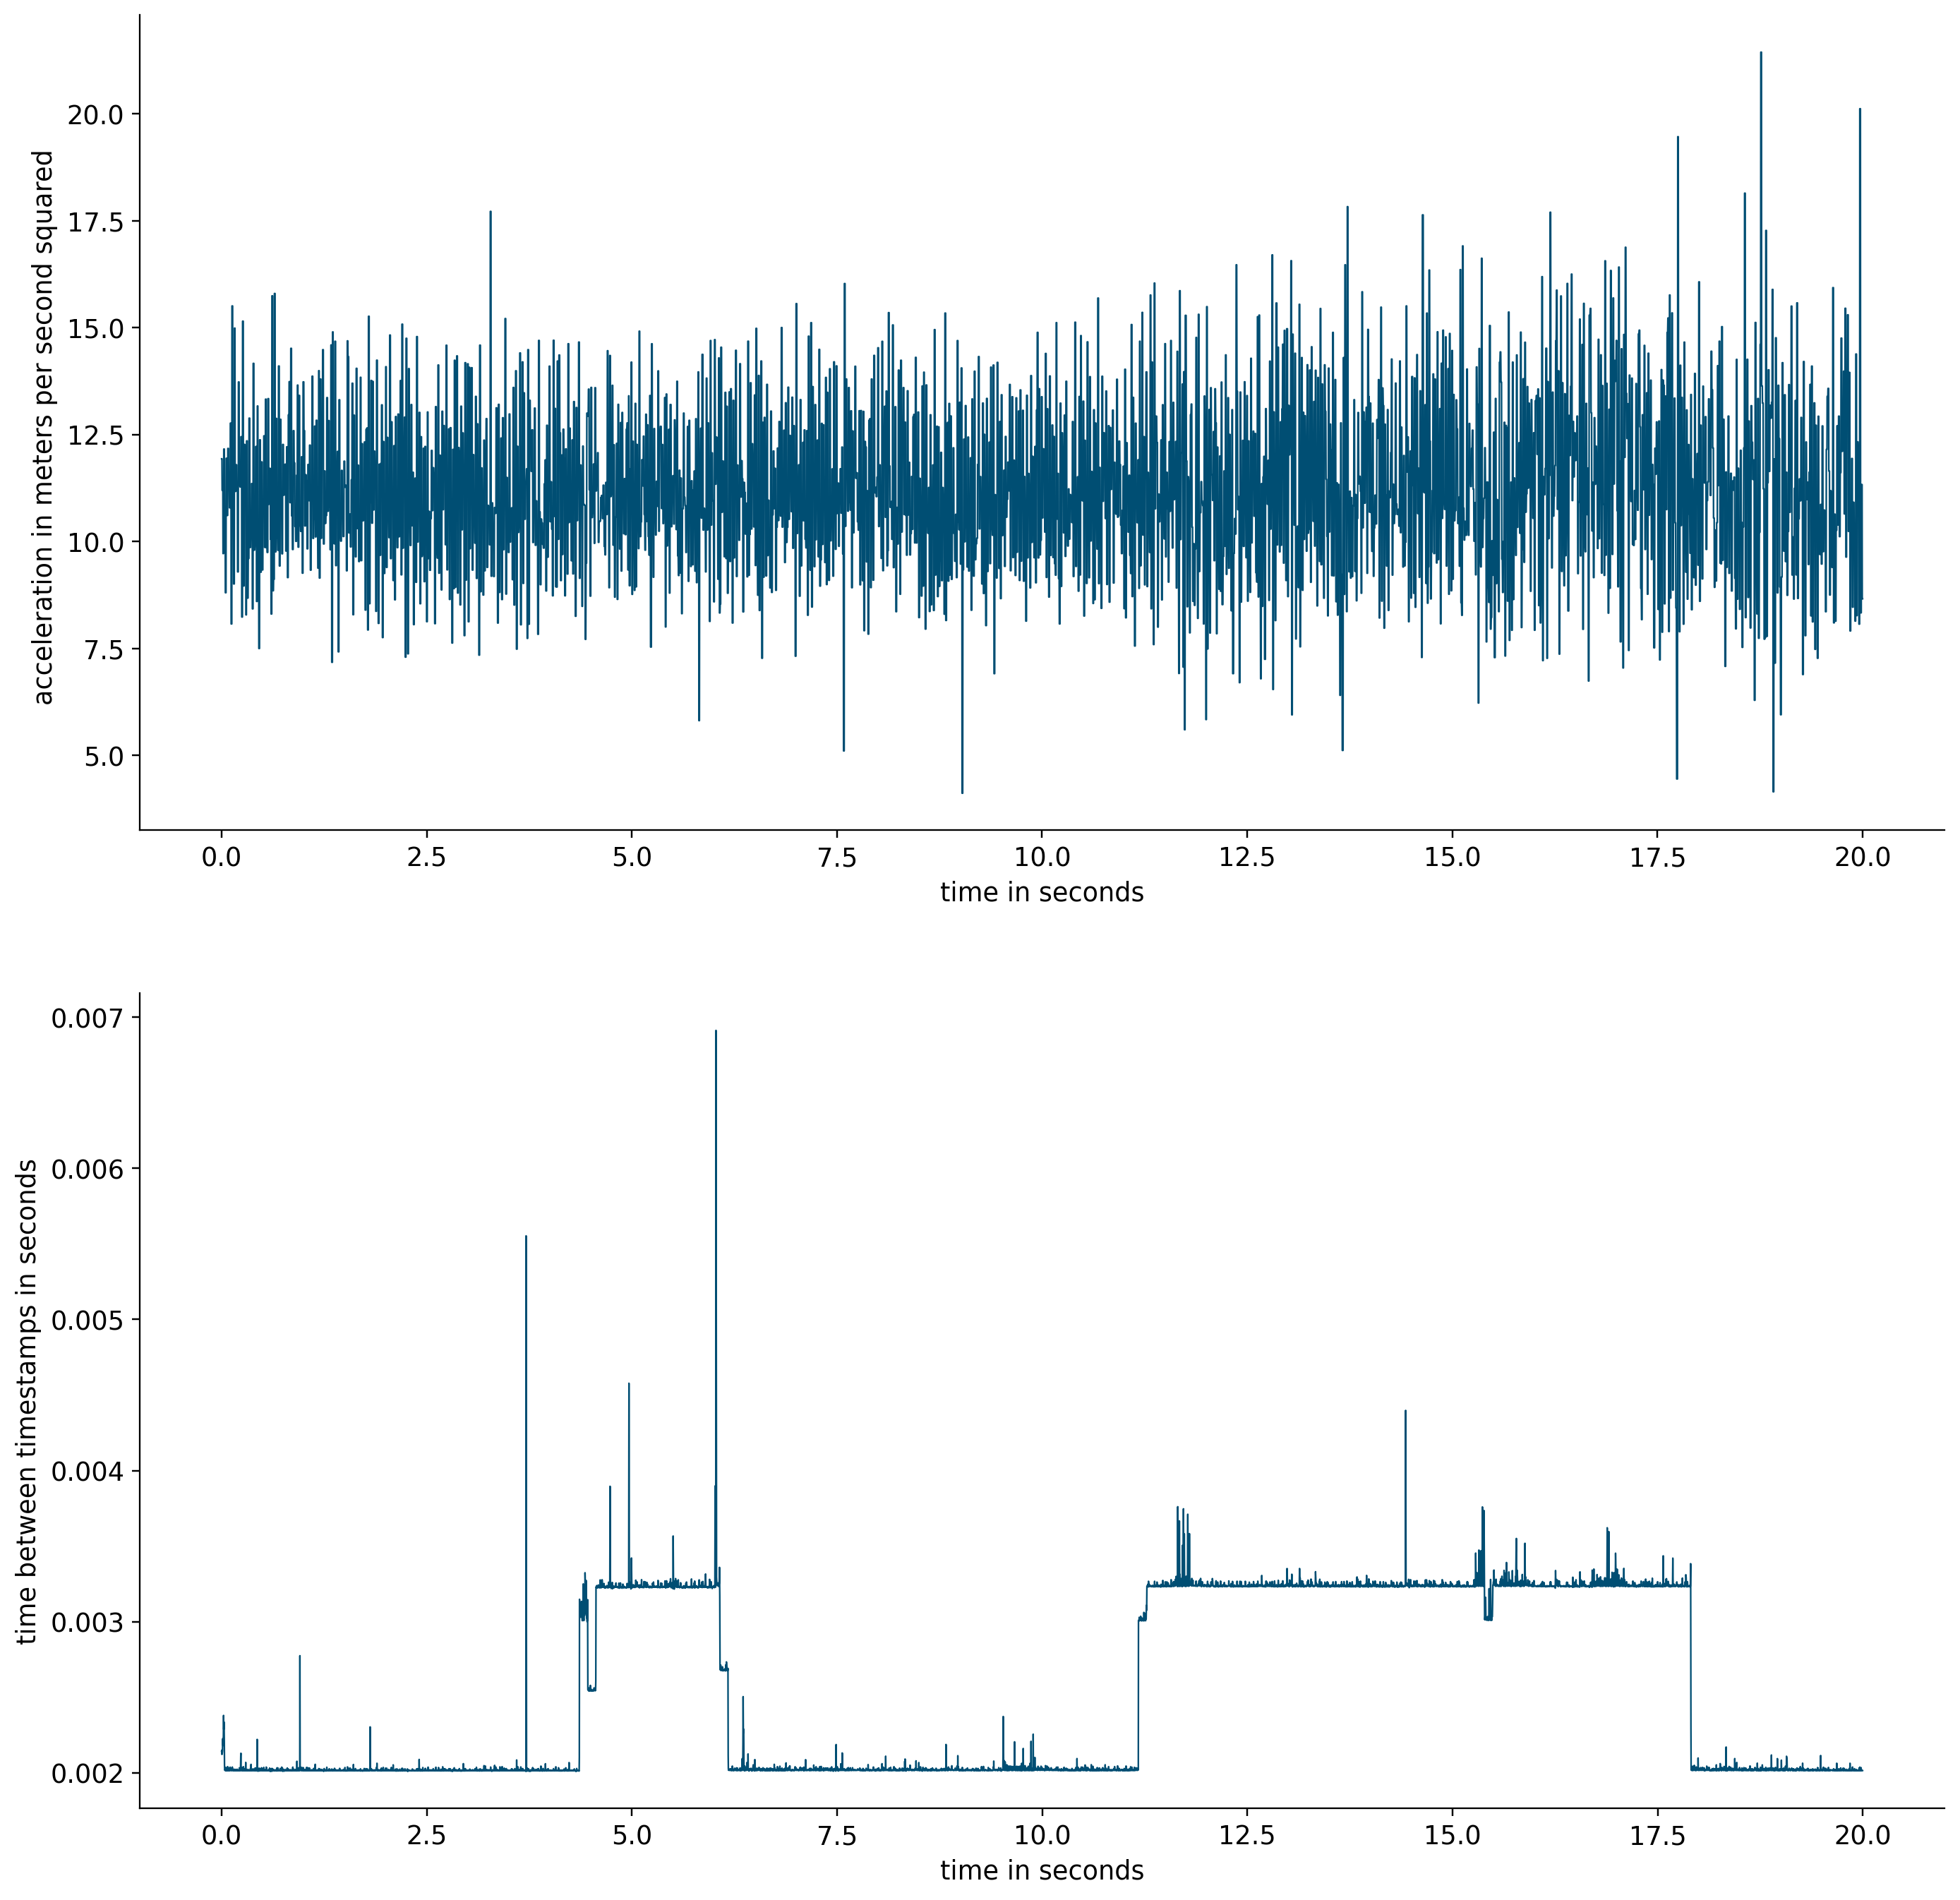

In [12]:
plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
plt.plot(timestamp, acceleration)
plt.xlabel("time in seconds")
plt.ylabel("acceleration in meters per second squared ")

time_differences = []
for i in range(len(timestamp)-1):
    time_differences.append(timestamp[i+1]-timestamp[i])
timestamp_short = timestamp[0:len(timestamp)-1]

plt.subplot(2,1,2)
plt.plot(timestamp_short, time_differences)
plt.xlabel("time in seconds")
plt.ylabel("time between timestamps in seconds")

#### 4. Interpolation der Messwerte



In [13]:
#in Funktion my_fft()

#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'amplitude in meters per second squared')

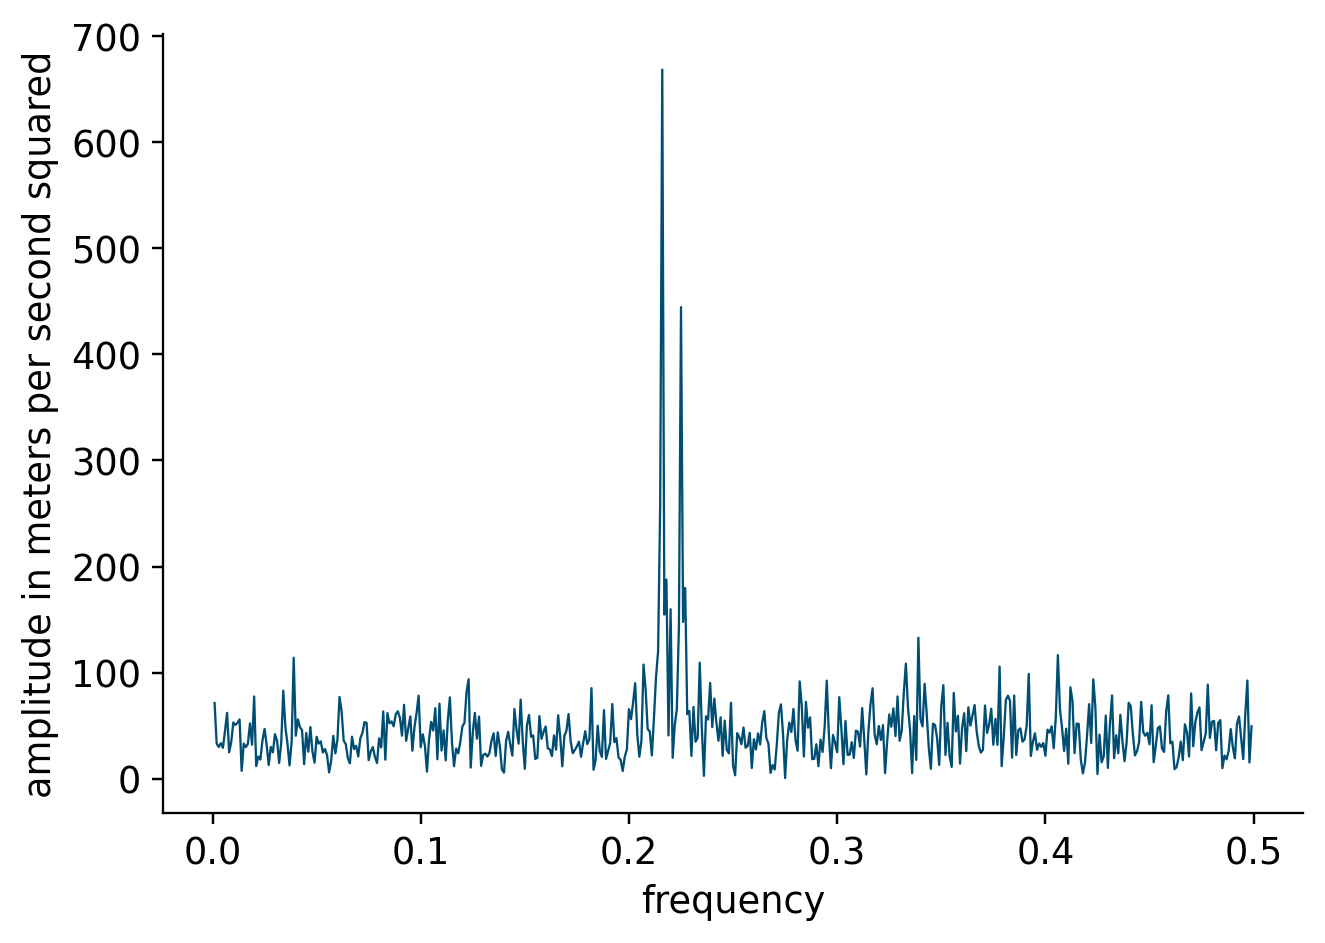

In [14]:
[amp, freq] = my_fft(acceleration, timestamp)
plt.plot(freq, amp)
plt.xlabel("frequency")
plt.ylabel("amplitude in meters per second squared")

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Sowohl beim Mixer als auch bei der Getreidemühle tritt viel Rauschen auf, jedoch lassen sich bei beiden Geräten Hauptfrequenzen erkennen, die besonders hohe Amplituden haben. Die Ergebnisse können wegen verschiedener Gründe von der Realität abweichen. Vorallem der Sensor hat Messungenauigkeiten und führt zu einem Rauschen. Auch dadurch, dass die Geräte nicht fest angebracht sind, sondern sich auch etwas bewegen können, können Ungenauigkeiten entstehen.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Ich fand den Versuch sehr Interessant, da ich mit Konzepten arbeiten konnte, die ich im Studium bereits kennengelernt, jedoch noch nie selbst verwendet hatte. Vorallem mochte ich, dass wir reale Gegenstände verwenden sollten, da ich dadurch sehr gut den praktischen Nutzen des Versuchs nachvollziehen konnte.